In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pylab as py
from IPython.display import Image

## Problem 5.3
Assume the densities at zero pressure for pure water and rock are:

In [3]:
rho_o_ice=1 #g/cm3
rho_o_rock=4 #g/cm3

Assume the ratio of atomic mass (A) to nuclear charge (Z) is 2 for pure ice and rock bodies. However, A/Z for ice should be sligthly lower because of the H.

In [4]:
rAZ=2

The PDF file submitted with this code goes through the derivation of the expression implemented in this code. Given the hydrostatic law, approximation for the equation of state and density, I obtained radius as a function of y and mass + d_mass. First I define the missing constants of interest. The bulk modulus at zero pressure is a crude representation of stiffness, since the surface is far from the pressures at which Fermi gas behaviour occurs.

In [178]:
k_oi=0.5 #Mbar-Bulk modulus found in problem 5.3a for ice bodies
k_or=5 #Mbar- Bulk modulus for rocky planets

#Gravitational constant
G=6.6743015e-11 # m3⋅kg–1⋅s–2

ME=(5.9722e25)*1000 #Mass of Earth in grams
M_oi=0.1*ME #Initial mass of icy bodies
M_or=0.5*ME #Initial mass of rocky planets

RE=6.3781e6*100 #Radius of the Earth in cm

#Constants to ease implementation of the expression for the radius
C1=(G*rho_o_ice)/(48*np.pi*k_oi)
C2=(G*rho_o_rock)/(48*np.pi*k_or)

The boundary conditions assume P=0 at the surface, where the density profile defined by y is 1. Therefore, I solve the system from y=0.1 to 1

In [167]:
#Density profile defined by y
y=np.linspace(0.1,1,1000)


In [172]:
#Calculation of delta mass considering an increase in mass lacks influence on the radius above 1000*ME
dM=((1000*ME)-(0.1*ME))/y.size

#Creating arrays to save mass throughout the iterations
listMi=[]
listMi.append(M_oi)

listMr=[]
listMr.append(M_or)

#Loop to integrate the expression in the PDF file
for i in range(1,y.size):
    #Previous mass + delta mass
    Mstepi=listMi[i-1]+(dM)
    listMi.append(Mstepi)
    #Temporary variable
    tempi=(C1*y*((Mstepi)/listMi[i-1]))
    #Calculating radius
    ri=np.power(tempi,(1/3))
    
    #Previous mass + delta mass
    Mstepr=listMr[i-1]+(dM)
    listMr.append(Mstepr)
    #Temporary variable
    temp=(C2*y*((Mstepr)/listMr[i-1]))
    #Calculating radius
    rr=np.power(temp,(1/3))

In [186]:
#Converting the list of masses to arrays for ice and rock, respectively
Mi=np.array(listMi)
Mr=np.array(listMr)

#Normalizing the results as suggested
normMi=Mi/ME
normRi=ri/RE

normMr=Mr/ME
normRr=rr/RE


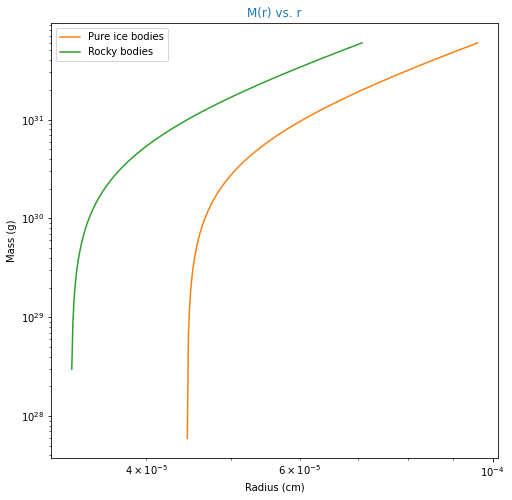

In [188]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.set_title('M(r) vs. r',color='C0')

ax.plot(ri,Mi, 'C1', label='Pure ice bodies')
ax.plot(rr,Mr, 'C2', label='Rocky bodies')
ax.legend()
plt.xlabel('Radius (cm)')
plt.ylabel('Mass (g)')
plt.yscale("log")
plt.xscale("log")

This emphasizes the importance of the hydrostatic equilibrium and equation of state in defining the positive relation between mass and radius of the planetary bodies.